In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom

In [9]:
import os
os.getcwd()

'C:\\Projekty\\bdcalc\\notebooks'

In [10]:
os.chdir('c:/Projekty/sim/PARETO_5/input/dicom')

In [13]:
!ls

CT.1.2.246.352.221.46429429099713233163182912957643298749.dcm
CT.1.2.246.352.221.46430761486785045981340611083660526236.dcm
CT.1.2.246.352.221.46445072802096147064347880650841619891.dcm
CT.1.2.246.352.221.46513207808349512542194333140225675658.dcm
CT.1.2.246.352.221.46730111777572689162121415025484085688.dcm
CT.1.2.246.352.221.4675212019916228395400692487490142635.dcm
CT.1.2.246.352.221.468184014249508201210869566518062158236.dcm
CT.1.2.246.352.221.469112409816288450314361979260639358891.dcm
CT.1.2.246.352.221.470172458699618806914989996900916350631.dcm
CT.1.2.246.352.221.471471440085314778017399355231192336549.dcm
CT.1.2.246.352.221.471494769467519025317917904279434120333.dcm
CT.1.2.246.352.221.471811484286306451214092287679092977831.dcm
CT.1.2.246.352.221.472798326159905971811495123548593917887.dcm
CT.1.2.246.352.221.472936443842680320713694215803493657992.dcm
CT.1.2.246.352.221.47314264808983069735975548742753387915.dcm
CT.1.2.246.352.221.47363788570862049832232700270711645076.dcm
C

In [16]:
img = dicom.dcmread('CT.1.2.246.352.221.46429429099713233163182912957643298749.dcm')

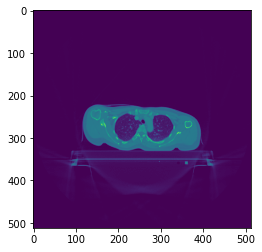

In [25]:
plt.imshow(img.pixel_array)

In [44]:
rs = dicom.dcmread('RS.1.2.246.352.221.528495316730692418114379003885362002849.dcm')

In [66]:
print(rs.ROIContourSequence[0].ContourSequence[0].ContourData)

[-107.3, -284.34, -85, -104.1, -284.76, -85, -100.9, -285.16, -85, -97.7, -285.28, -85, -94.49, -285.16, -85, -91.29, -285.16, -85, -88.09, -285.16, -85, -84.88, -285.36, -85, -81.68, -285.76, -85, -78.48, -286.16, -85, -75.27, -286.56, -85, -72.07, -286.56, -85, -68.87, -286.36, -85, -65.66, -286.16, -85, -62.46, -286.36, -85, -59.26, -286.36, -85, -56.05, -286.16, -85, -52.85, -285.56, -85, -49.65, -285.03, -85, -46.45, -284.15, -85, -46.04, -284.05, -85, -43.24, -283.43, -85, -40.04, -283.35, -85, -36.84, -282.75, -85, -33.63, -282.12, -85, -30.43, -280.95, -85, -30.16, -280.85, -85, -27.23, -280.05, -85, -24.02, -279.82, -85, -20.82, -279.35, -85, -17.62, -278.94, -85, -15.14, -277.65, -85, -14.41, -277.2, -85, -11.21, -276.95, -85, -8.01, -276.55, -85, -4.8, -275.75, -85, -1.6, -275.07, -85, -0.36, -274.45, -85, 1.6, -273.52, -85, 4.8, -273.74, -85, 8.01, -273.6, -85, 11.21, -273.6, -85, 14.41, -273.74, -85, 17.62, -273.94, -85, 20.82, -274.18, -85, 21.35, -274.45, -85, 24.02, -27

In [30]:
doses = dicom.dcmread('RD.1.2.246.352.71.7.551177258822.7674277.20201013211533.dcm')
doses.pixel_array

array([[[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0, 11584, 12318, ..., 12035,   726,     0],
        [    0,  8092, 11740, ...,  1032,    24,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0, 15071, 24039, ..., 25719,  1346,     0],
        [    0, 10725, 21986, ...,  1499,    24,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,  1660, ...,  7093,     0,     0],
        [    0,     0,     0, ...,     0,    

In [94]:
from ipywidgets import interact
import matplotlib.cm as cm

In [111]:
@interact(slice=(0,doses.pixel_array.shape[0]-1))
def plot(slice):
    plt.subplots(1,1,dpi=200)
    d = doses.pixel_array[slice, :, :]
    d[d < np.max(d)*0.98] = 0
    ct=img.pixel_array
    d[d > np.max(d)*0.98] = d[d > np.max(d)*0.98]
    masked_data = np.ma.masked_where(d > np.max(d)*0.98, d)
    plt.imshow(ct, cmap=cm.gray)
    plt.imshow(masked_data, origin='lower', alpha=0.9)
    plt.xlim(0,500)
    plt.ylim(0,500)
    

interactive(children=(IntSlider(value=26, description='slice', max=53), Output()), _dom_classes=('widget-inter…